In [1]:
cd /data/projects/windturbine-identification/MachineLearningCourse

/data/projects/windturbine-identification/MachineLearningCourse


In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 18 13:04:17 2019

@author: jschmidt
"""
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np

import pickle  # pip install dill --user
import matplotlib.pyplot as plt
from keras.applications import VGG16
import tensorflow as tf
#import tensorflow.tfp as tfp

import imp
import scripts.windturbines.functions_pattern_recognition as fpr
imp.reload(fpr)

gpu_fraction = 0.8
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

import keras.backend as K

def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def mean_true(y_true, y_pred):
    return K.mean(y_true)

def c_metric(y_true, y_pred):
    x = y_true
    y = y_pred
    diff_x = x - K.mean(x)
    diff_y = y - K.mean(y)
    sum_diffs = K.sum(diff_x * diff_y)
    low = K.sqrt(K.sum(diff_x * diff_x)) * K.sqrt(K.sum(diff_y * diff_y))
    metric = sum_diffs / low
    return metric

def c_length(y_true, y_pred):
    length = tf.to_float(tf.size(y_true))
    return length


Using TensorFlow backend.
/home/jschmidt/.conda/envs/windturbine-identification/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jschmidt/.conda/envs/windturbine-identification/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jschmidt/.conda/envs/windturbine-identification/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 =

EG
13
MA
13
ZA
13
CN
13
IN
13
JP
13
KP
13
PK
13
PH
13
TH
13
CR
13
TR
13
AT
13
BE
13
BG
13
HR
13
DK
13
FI
13
FR
13
DE
13
GR
13
IE
13
IT
13
LT
13
NL
13
NO
13
PL
13
PT
13
RO
13
ES
13
SE
13
GB
13
UA
13
CA
13
MX
13
US
13
AU
13
NZ
13
BR
13
CL
13
UY
13
MIX
13
GLOBAL
13
EG
18
MA
18
ZA
18
CN
18
IN
18
JP
18
KP
18
PK
18
PH
18
TH
18
CR
18
TR
18
AT
18
BE
18
BG
18
HR
18
DK
18
FI
18
FR
18
DE
18
GR
18
IE
18
IT
18
LT
18
NL
18
NO
18
PL
18
PT
18
RO
18
ES
18
SE
18
GB
18
UA
18
CA
18
MX
18
US
18
AU
18
NZ
18
BR
18
CL
18
UY
18
MIX
18
GLOBAL
18
EG
19
MA
19
ZA
19
CN
19
IN
19
JP
19
KP
19
PK
19
PH
19
TH
19
CR
19
TR
19
AT
19
BE
19
BG
19
HR
19
DK
19
FI
19
FR
19
DE
19
GR
19
IE
19
IT
19
LT
19
NL
19
NO
19
PL
19
PT
19
RO
19
ES
19
SE
19
GB
19
UA
19
CA
19
MX
19
US
19
AU
19
NZ
19
BR
19
CL
19
UY
19
MIX
19
GLOBAL
19
EG
13
MA
13
ZA
13
CN
13
IN
13
JP
13
KP
13
PK
13
PH
13
TH
13
CR
13
TR
13
AT
13
BE
13
BG
13
HR
13
DK
13
FI
13
FR
13
DE
13
GR
13
IE
13
IT
13
LT
13
NL
13
NO
13
PL
13
PT
13
RO
13
ES
13
SE
13
GB
13
UA
13
CA
13
MX
13
U

# Training Phase

In [3]:
COUNTRY = "US"

train_dir = fpr.get_param(COUNTRY,"PATH_ML_IMAGES_TYPE_REGRESSION_TRAIN")
test_dir = fpr.get_param(COUNTRY,"PATH_ML_IMAGES_TYPE_REGRESSION_TEST")

# Part II: Pretrained model


#conv_base = VGG16(weights='imagenet',
#                  include_top=False,
#                  input_shape=(256, 256, 3))

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

#set_trainable = False
#for layer in conv_base.layers:
#    if layer.name == 'block4_conv1':
#        set_trainable = True
#    if set_trainable:
#        layer.trainable = True
#    else:
#        layer.trainable = False
        
        
        
pd_train = pd.read_csv(train_dir + "list.csv")
pd_test = pd.read_csv(test_dir + "list.csv")


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:


pd_train['orig'] = pd_train['t_rd']

pd_train['score_class'] = "small"
pd_train['score_class'][pd_train['orig'] > 75] = "middle"
pd_train['score_class'][pd_train['orig'] > 90] = "large"

pd_test['orig'] = pd_test['t_rd']
pd_test['score_class'] = "small"
pd_test['score_class'][pd_test['orig'] > 75] = "middle"
pd_test['score_class'][pd_test['orig'] > 90] = "large"


/home/jschmidt/.conda/envs/windturbine-identification/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/jschmidt/.conda/envs/windturbine-identification/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/jschmidt/.conda/envs/windturbine-identification/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ver

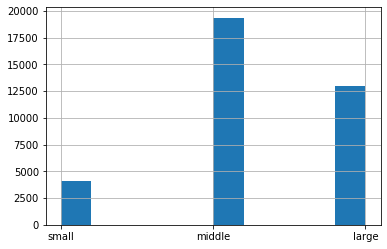

In [5]:
pd_train['score_class'].hist()

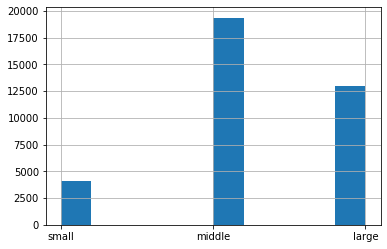

In [6]:
pd_train.head()
pd_train['score_class'].hist()

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   horizontal_flip = True,
                                   fill_mode = "nearest", 
                                   zoom_range = 0.2,
                                   width_shift_range = 0.2, 
                                   height_shift_range = 0.2,
                                   rotation_range = 30,
                                   validation_split = 0.25) 

train_generator = train_datagen.flow_from_dataframe(dataframe = pd_train, 
                                                    directory = train_dir, 
                                                    x_col = "id_s", 
                                                    y_col = "score_class", 
                                                    has_ext = True, 
                                                    class_mode="categorical", 
                                                    subset="training",
                                                    batch_size=20)

#                                                    target_size=(img_width, img_height), 


val_generator = train_datagen.flow_from_dataframe(dataframe = pd_train, 
                                                    directory = train_dir, 
                                                    x_col = "id_s", 
                                                    y_col = "score_class", 
                                                    has_ext = True, 
                                                    class_mode="categorical", 
                                                    subset="validation",
                                                    batch_size=20)

#                                                    target_size=(img_width, img_height), 

# Note that the validation data should not be augmented!


Found 27389 validated image filenames belonging to 3 classes.
Found 9129 validated image filenames belonging to 3 classes.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        36928     
__________

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

mcp_save = ModelCheckpoint('models/model-regression-unfreezed-2-layer-2-layer-classification-6497-turbines-{epoch:04d}-{val_loss:.4f}.h5',
                           save_best_only=True, monitor='val_loss', mode='min')




In [10]:
#tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())

history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=200,
      validation_data=val_generator,
      validation_steps=50,
      callbacks=[mcp_save],
      verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
 - 115s - loss: 0.8980 - acc: 0.5050 - val_loss: 1.5239 - val_acc: 0.5660
Epoch 2/200
 - 62s - loss: 0.8332 - acc: 0.4980 - val_loss: 1.7179 - val_acc: 0.0780
Epoch 3/200
 - 135s - loss: 0.8097 - acc: 0.5180 - val_loss: 1.7133 - val_acc: 0.3210
Epoch 4/200
 - 56s - loss: 0.8046 - acc: 0.5060 - val_loss: 1.7400 - val_acc: 0.1450
Epoch 5/200
 - 62s - loss: 0.8529 - acc: 0.4650 - val_loss: 1.6561 - val_acc: 0.3660
Epoch 6/200
 - 55s - loss: 0.8303 - acc: 0.4770 - val_loss: 1.6411 - val_acc: 0.5730
Epoch 7/200
 - 78s - loss: 0.8130 - acc: 0.4990 - val_loss: 1.7375 - val_acc: 0.5570
Epoch 8/200
 - 138s - loss: 0.8086 - acc: 0.5580 - val_loss: 1.7357 - val_acc: 0.5600
Epoch 9/200
 - 116s - loss: 0.8265 - acc: 0.5370 - val_loss: 1.5522 - val_acc: 0.6000
Epoch 10/200
 - 71s - loss: 0.8095 - acc: 0.5290 - val_loss: 1.5890 - val_acc: 0.5672
Epoch 11/200
 - 58s - loss: 0.8362 - acc: 0.5120 - val_loss: 1.6579 - val_acc: 0.5630
Epoch 12/20

Epoch 93/200
 - 89s - loss: 0.7529 - acc: 0.5600 - val_loss: 2.0079 - val_acc: 0.3300
Epoch 94/200
 - 146s - loss: 0.7714 - acc: 0.5470 - val_loss: 1.8779 - val_acc: 0.3690
Epoch 95/200
 - 129s - loss: 0.7887 - acc: 0.5190 - val_loss: 1.8708 - val_acc: 0.4000
Epoch 96/200
 - 142s - loss: 0.8016 - acc: 0.5500 - val_loss: 1.7074 - val_acc: 0.4530
Epoch 97/200
 - 57s - loss: 0.8072 - acc: 0.5490 - val_loss: 1.7004 - val_acc: 0.4670
Epoch 98/200
 - 56s - loss: 0.7940 - acc: 0.5720 - val_loss: 1.6957 - val_acc: 0.3860
Epoch 99/200
 - 60s - loss: 0.7838 - acc: 0.5530 - val_loss: 1.7929 - val_acc: 0.3970
Epoch 100/200
 - 55s - loss: 0.7779 - acc: 0.5570 - val_loss: 1.8835 - val_acc: 0.5040
Epoch 101/200
 - 48s - loss: 0.7794 - acc: 0.5760 - val_loss: 1.7614 - val_acc: 0.4965
Epoch 102/200
 - 40s - loss: 0.7857 - acc: 0.5480 - val_loss: 1.7745 - val_acc: 0.4920
Epoch 103/200
 - 42s - loss: 0.8136 - acc: 0.5200 - val_loss: 1.7771 - val_acc: 0.4810
Epoch 104/200
 - 44s - loss: 0.7783 - acc: 0.56

Epoch 188/200
 - 19s - loss: 0.7697 - acc: 0.5900 - val_loss: 1.9233 - val_acc: 0.3900
Epoch 189/200
 - 19s - loss: 0.7786 - acc: 0.5700 - val_loss: 1.7580 - val_acc: 0.4370
Epoch 190/200
 - 19s - loss: 0.7671 - acc: 0.5930 - val_loss: 1.8573 - val_acc: 0.3550
Epoch 191/200
 - 19s - loss: 0.7701 - acc: 0.5770 - val_loss: 1.8798 - val_acc: 0.3990
Epoch 192/200
 - 19s - loss: 0.7665 - acc: 0.5793 - val_loss: 2.0289 - val_acc: 0.3701
Epoch 193/200
 - 19s - loss: 0.7708 - acc: 0.5920 - val_loss: 1.7770 - val_acc: 0.3210
Epoch 194/200
 - 19s - loss: 0.7610 - acc: 0.5960 - val_loss: 1.7892 - val_acc: 0.4890
Epoch 195/200
 - 19s - loss: 0.7519 - acc: 0.5860 - val_loss: 1.7577 - val_acc: 0.5110
Epoch 196/200
 - 19s - loss: 0.7695 - acc: 0.6080 - val_loss: 1.8367 - val_acc: 0.3910
Epoch 197/200
 - 19s - loss: 0.7831 - acc: 0.5750 - val_loss: 1.8539 - val_acc: 0.4310
Epoch 198/200
 - 19s - loss: 0.7766 - acc: 0.5920 - val_loss: 1.8173 - val_acc: 0.4080
Epoch 199/200
 - 19s - loss: 0.7722 - acc: 

# Validation vs. Training

In [11]:
acc = history.history['c_metric']
val_acc = history.history['val_c_metric']
#acc = history.history['acc']
#val_acc = history.history['val_acc']


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()




KeyError: 'c_metric'

# Model selection

In [ ]:
min_val_loss = min(val_loss)

i = val_loss.index(min_val_loss) + 1

best_model = "models/model-unfreezed-2-layer-2-layer-classification-6497-turbines-" + "{0:0=4d}".format(i) + "-" + "{0:.4f}".format(min_val_loss) + ".h5"

#best_model = "models/model-unfreezed-2-layer-2-layer-classification-6497-turbines-0005-0.0339.h5"

best_model

# Test

In [ ]:
test_base_dir = fpr.get_param(COUNTRY, "PATH_ML_IMAGES_TURBINES_TEST")+"../"

test_model = models.load_model(best_model)_Ö
test_loss, test_acc = test_model.evaluate_generator(test_generator, steps=32)
print('test acc:', test_acc)
print('test loss:', test_loss)
